SUMMARY
================================================================================

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE
================================================================================

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set, and must
       send us an electronic or paper copy of those publications.

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a faculty member of the GroupLens Research Project at the
       University of Minnesota.

If you have any further questions or comments, please contact Sean McNee
<mcnee@cs.umn.edu>. 

ACKNOWLEDGEMENTS
================================================================================

Thanks to Shyong Lam and Jon Herlocker for cleaning up and generating the data
set.

FURTHER INFORMATION ABOUT THE GROUPLENS RESEARCH PROJECT
================================================================================

The GroupLens Research Project is a research group in the Department of 
Computer Science and Engineering at the University of Minnesota. Members of 
the GroupLens Research Project are involved in many research projects related 
to the fields of information filtering, collaborative filtering, and 
recommender systems. The project is lead by professors John Riedl and Joseph 
Konstan. The project began to explore automated collaborative filtering in 
1992, but is most well known for its world wide trial of an automated 
collaborative filtering system for Usenet news in 1996. Since then the project 
has expanded its scope to research overall information filtering solutions, 
integrating in content-based methods as well as improving current collaborative 
filtering technology.

Further information on the GroupLens Research project, including research 
publications, can be found at the following web site:
        
        http://www.grouplens.org/

GroupLens Research currently operates a movie recommender based on 
collaborative filtering:

        http://www.movielens.org/

RATINGS FILE DESCRIPTION
================================================================================

All ratings are contained in the file "ratings.dat" and are in the
following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

USERS FILE DESCRIPTION
================================================================================

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

MOVIES FILE DESCRIPTION
================================================================================

Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

Links Data File Structure (links.csv)
---------------------------------------

Identifiers that can be used to link to other sources of movie data are contained in the file `links.csv`. Each line of this file after the header row represents one movie, and has the following format:

    movieId,imdbId,tmdbId

movieId is an identifier for movies used by <https://movielens.org>. E.g., the movie Toy Story has the link <https://movielens.org/movies/1>.

imdbId is an identifier for movies used by <http://www.imdb.com>. E.g., the movie Toy Story has the link <http://www.imdb.com/title/tt0114709/>.

tmdbId is an identifier for movies used by <https://www.themoviedb.org>. E.g., the movie Toy Story has the link <https://www.themoviedb.org/movie/862>.

Use of the resources listed above is subject to the terms of each provider.

GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late
1990s and early 2000s. The data provides movie ratings, movie metadata (genres and year), and demographic data about the 
users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of
recommendation systems based on machine learning algorithms. 

The MovieLens 1M dataset contains one million ratings collected from six thousand users on four thousand movies. It’s 
spread across three tables: ratings, user information, and movie information. 

In [34]:
import pandas as pd
import numpy as np

# Extracting data

In [35]:
unames=["user_id", "gender", "age", "occupation", "zip"]
users= pd.read_table("users.dat", sep="::", header=None, names=unames, engine="python")
users

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [36]:
rnames=["user_id", "movie_id", "rating", "timestamp"]
ratings= pd.read_csv("ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [37]:
mnames=["movie_id", "title", "genres"]
movies=pd.read_csv("movies.csv")
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Cleaning the data

In [38]:
ratings.rename(columns = {'userId':'user_id', 'movieId':'movie_id'}, inplace = True)
ratings.head(10)

,user_id,movie_id,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
5,1,1088,4.0,1147868495
6,1,1175,3.5,1147868826
7,1,1217,3.5,1147878326
8,1,1237,5.0,1147868839
9,1,1250,4.0,1147868414


In [39]:
movies.rename(columns = {'movieId':'movie_id'}, inplace = True)
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings
for a particular movie by gender identity and age. As you will see, this is more convenient to do with all of the data 
merged together into a single table. Using pandas’s merge function, we first merge ratings with users and then merge that 
result with the movies data. pandas infers which columns to use as the merge (or join) keys based on overlapping names:

In [40]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,296,5.0,1147880044,F,1,10,48067,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,M,25,15,55117,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,M,45,7,02460,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,M,25,20,55455,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,M,35,1,06810,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...,...,...,...,...
899101,6039,1145,3.0,848774734,F,45,0,01060,Snowriders (1996),Documentary
899102,6039,1146,3.0,848774673,F,45,0,01060,Curtis's Charm (1995),Comedy|Drama
899103,6039,1155,3.0,848774797,F,45,0,01060,"Invitation, The (Zaproszenie) (1986)",Drama
899104,6039,1157,3.0,848774768,F,45,0,01060,"Symphonie pastorale, La (1946)",Drama


In [41]:
data.iloc[0]

user_id                                 1
movie_id                              296
rating                                5.0
timestamp                      1147880044
gender                                  F
age                                     1
occupation                             10
zip                                 48067
title                 Pulp Fiction (1994)
genres        Comedy|Crime|Drama|Thriller
Name: 0, dtype: object

# Transforming the data

To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:

In [42]:
mean_ratings= data.pivot_table("rating", index="title", columns="gender", aggfunc="mean")
mean_ratings.head(10)

gender,F,M
title,,
"""Great Performances"" Cats (1998)",2.00,3.681818
#realityhigh (2017),3.00,NaN
$ (Dollars) (1971),NaN,4.000000
$5 a Day (2008),NaN,3.666667
$9.99 (2008),NaN,2.666667
'71 (2014),3.00,3.409091
'Hellboy': The Seeds of Creation (2004),3.75,2.250000
'Neath the Arizona Skies (1934),NaN,3.250000
'R Xmas (2001),NaN,2.750000


In [43]:
indexer=mean_ratings.sum(axis="columns").argsort()
indexer.values[:]

array([ 8711, 18492,  5263, ...,  5249,  9476, 11551], dtype=int64)

In [44]:
mean_ratings_20 = mean_ratings.take(indexer[-20:])
mean_ratings_20

gender,F,M
title,,
"Man Who Sleeps, The (Un homme qui dort) (1974)",5.000000,4.500000
"Woman in the Window, The (1944)",4.500000,5.000000
Kiler (1997),4.500000,5.000000
"I Was Born, But... (a.k.a. Children of Tokyo) (Otona no miru ehon - Umarete wa mita keredo) (1932)",4.500000,5.000000
Twin Peaks (1989),4.916667,4.600000
Death on the Staircase (Soupçons) (2004),4.666667,5.000000
Life is a Miracle (Zivot je cudo) (2004),5.000000,4.666667
Belladonna of Sadness (1973),5.000000,4.750000
Satan's Tango (Sátántangó) (1994),5.000000,4.750000


In [45]:
mean_ratings_20 = mean_ratings_20.stack()
mean_ratings_20

title                                                                                               gender
Man Who Sleeps, The (Un homme qui dort) (1974)                                                      F         5.000000
                                                                                                    M         4.500000
Woman in the Window, The (1944)                                                                     F         4.500000
                                                                                                    M         5.000000
Kiler (1997)                                                                                        F         4.500000
                                                                                                    M         5.000000
I Was Born, But... (a.k.a. Children of Tokyo) (Otona no miru ehon - Umarete wa mita keredo) (1932)  F         4.500000
                                                            

In [46]:
mean_ratings_20.name = "rating_by_gender"
mean_ratings_20 = mean_ratings_20.reset_index()
mean_ratings_20.head(10)

,title,gender,rating_by_gender
0,"Man Who Sleeps, The (Un homme qui dort) (1974)",F,5.000000
1,"Man Who Sleeps, The (Un homme qui dort) (1974)",M,4.500000
2,"Woman in the Window, The (1944)",F,4.500000
3,"Woman in the Window, The (1944)",M,5.000000
4,Kiler (1997),F,4.500000
5,Kiler (1997),M,5.000000
6,"I Was Born, But... (a.k.a. Children of Tokyo) ...",F,4.500000
7,"I Was Born, But... (a.k.a. Children of Tokyo) ...",M,5.000000
8,Twin Peaks (1989),F,4.916667
9,Twin Peaks (1989),M,4.600000


# Visualizing the data

The 20 best rated films by gender

<AxesSubplot:xlabel='rating_by_gender', ylabel='title'>

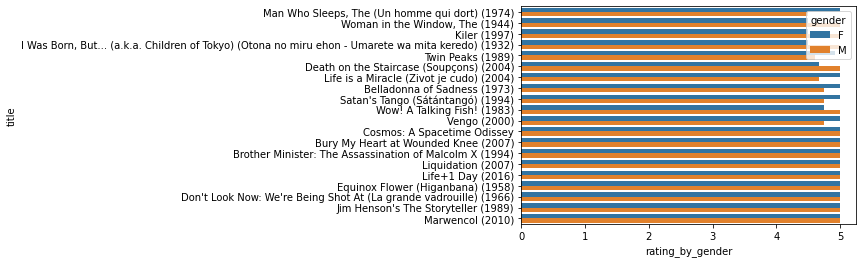

In [47]:
import seaborn as sns
sns.barplot(x="rating_by_gender",y="title",hue="gender", data= mean_ratings_20)

This produced another DataFrame with the most rated films containing mean ratings with movie titles as row labels (the "index") and gender as column labels. I first filter down to movies that received at least 250 ratings (an arbitrary number); to do this, I group  the data by title, and use size() to get a Series of group sizes for each title:

# Transforming the data

In [48]:
ratings_by_title=data.groupby("title").size()
ratings_by_title.head(20)

title
"Great Performances" Cats (1998)              12
#realityhigh (2017)                            1
$ (Dollars) (1971)                             1
$5 a Day (2008)                                3
$9.99 (2008)                                   3
'71 (2014)                                    15
'Hellboy': The Seeds of Creation (2004)        4
'Neath the Arizona Skies (1934)                2
'R Xmas (2001)                                 2
'Round Midnight (1986)                         6
'Salem's Lot (2004)                            8
'Til There Was You (1997)                     17
'Tis the Season for Love (2015)                1
'burbs, The (1989)                           116
'night Mother (1986)                          10
(500) Days of Summer (2009)                  397
(Dis)Honesty: The Truth About Lies (2015)      2
(Untitled) (2009)                              2
*batteries not included (1987)                58
+1 (2013)                                      2
dtype: int64

In [49]:
most_rated_titles= ratings_by_title.index[ratings_by_title >= 250]
most_rated_titles

Index(['(500) Days of Summer (2009)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '12 Angry Men (1957)', '2001: A Space Odyssey (1968)',
       '21 Grams (2003)', '28 Days Later (2002)', '300 (2007)',
       '40-Year-Old Virgin, The (2005)',
       ...
       'X-Men: Days of Future Past (2014)', 'X-Men: First Class (2011)',
       'X-Men: The Last Stand (2006)', 'X2: X-Men United (2003)',
       'You've Got Mail (1998)', 'Young Frankenstein (1974)', 'Zodiac (2007)',
       'Zombieland (2009)', 'Zoolander (2001)', 'Zootopia (2016)'],
      dtype='object', name='title', length=891)

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings using .loc:

In [50]:
mean_ratings= mean_ratings.loc[most_rated_titles]
mean_ratings

gender,F,M
title,,
(500) Days of Summer (2009),3.719626,3.812069
10 Things I Hate About You (1999),3.435374,3.615385
101 Dalmatians (1996),3.131068,2.978261
101 Dalmatians (One Hundred and One Dalmatians) (1961),3.494382,3.520089
12 Angry Men (1957),4.255495,4.199746
...,...,...
Young Frankenstein (1974),3.965116,3.977667
Zodiac (2007),3.560811,3.691038
Zombieland (2009),3.698473,3.816716


To see the top films among female viewers, we can sort by the F column in descending order:

In [51]:
top_female_ratings= mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Godfather, The (1972)",4.443649,4.325385
"Shawshank Redemption, The (1994)",4.428320,4.435016
"Godfather: Part II, The (1974)",4.385224,4.292067
"Usual Suspects, The (1995)",4.293874,4.312202
Schindler's List (1993),4.293323,4.263596


Measuring Rating Disagreement

Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to mean_ratings containing the difference in means, then sort by that:

In [52]:
mean_ratings["diff"]= mean_ratings["M"]-mean_ratings["F"]

In [53]:
mean_ratings

gender,F,M,diff
title,,,
(500) Days of Summer (2009),3.719626,3.812069,0.092443
10 Things I Hate About You (1999),3.435374,3.615385,0.180010
101 Dalmatians (1996),3.131068,2.978261,-0.152807
101 Dalmatians (One Hundred and One Dalmatians) (1961),3.494382,3.520089,0.025707
12 Angry Men (1957),4.255495,4.199746,-0.055749
...,...,...,...
Young Frankenstein (1974),3.965116,3.977667,0.012551
Zodiac (2007),3.560811,3.691038,0.130227
Zombieland (2009),3.698473,3.816716,0.118242


Sorting by "diff" yields the movies with the greatest rating difference so that we can see which ones were preferred by women:

In [54]:
sorted_by_diff= mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Striptease (1996),2.602941,2.201220,-0.401722
Swordfish (2001),3.298387,2.947090,-0.351297
Cape Fear (1991),3.801980,3.467249,-0.334731
"River Wild, The (1994)",3.551402,3.271698,-0.279704
Patton (1970),4.256098,3.986301,-0.269796


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate as highly:

In [55]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Aristocats, The (1970)",3.115000,3.451777,0.336777
Star Trek V: The Final Frontier (1989),2.620000,2.938776,0.318776
Showgirls (1995),1.978022,2.279487,0.301465
Dr. Dolittle (1998),2.396341,2.680791,0.284449
"Rocky Horror Picture Show, The (1975)",3.127660,3.381844,0.254185


In [56]:
sorted_by_diff.tail()

gender,F,M,diff
title,,,
"Rocky Horror Picture Show, The (1975)",3.127660,3.381844,0.254185
Dr. Dolittle (1998),2.396341,2.680791,0.284449
Showgirls (1995),1.978022,2.279487,0.301465
Star Trek V: The Final Frontier (1989),2.620000,2.938776,0.318776
"Aristocats, The (1970)",3.115000,3.451777,0.336777


Suppose instead you wanted the movies that elicited the most disagreement among viewers, independent of gender identification. Disagreement can be measured by the variance or standard deviation of the ratings. To get this, we first compute the rating standard deviation by title and then filter down to the active titles:

In [57]:
rating_std_by_title= data.groupby("title")["rating"].std()
rating_std_by_title=rating_std_by_title.loc[most_rated_titles]
rating_std_by_title.head()

title
(500) Days of Summer (2009)                               0.902808
10 Things I Hate About You (1999)                         0.938845
101 Dalmatians (1996)                                     1.000802
101 Dalmatians (One Hundred and One Dalmatians) (1961)    0.962350
12 Angry Men (1957)                                       0.816667
Name: rating, dtype: float64

Then, we sort in descending order and select the first 10 rows, which are roughly the 10 most divisively rated movies:

In [58]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Blair Witch Project, The (1999)           1.254746
Final Destination (2000)                  1.242084
Natural Born Killers (1994)               1.217770
Beavis and Butt-Head Do America (1996)    1.206011
Dumb & Dumber (Dumb and Dumber) (1994)    1.196526
Moulin Rouge (2001)                       1.191026
Waterboy, The (1998)                      1.189866
Saw (2004)                                1.179653
Rocky Horror Picture Show, The (1975)     1.178029
Event Horizon (1997)                      1.175879
Name: rating, dtype: float64

You may have noticed that movie genres are given as a pipe-separated (|) string, since a single movie can belong to multiple genres. To help us group the ratings data by genre, we can use the explode method on DataFrame. Let's take alook at how this works. First, we can split the genres string into a list of genres using the str.split method on the Series:

In [59]:
movies["genres"].head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [60]:
movies["genres"].head().str.split("|")

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [61]:
movies["genre"]=movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


Now, calling movies.explode("genre") generates a new DataFrame with one row for each "inner" element in each list of movie genres. For example, if a movie is classified as both a comedy and a romance, then there will be two rows in the result, one with just "Comedy" and the other with just "Romance":

In [62]:
#explode()

In [63]:
movies_exploded=movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


Now, we can merge all three tables together and group by genre:

In [64]:
rating_with_genre= pd.merge(pd.merge(movies_exploded,ratings),users)
rating_with_genre

,movie_id,title,genre,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Adventure,2,3.5,1141415820,M,56,16,70072
1,1,Toy Story (1995),Animation,2,3.5,1141415820,M,56,16,70072
2,1,Toy Story (1995),Children,2,3.5,1141415820,M,56,16,70072
3,1,Toy Story (1995),Comedy,2,3.5,1141415820,M,56,16,70072
4,1,Toy Story (1995),Fantasy,2,3.5,1141415820,M,56,16,70072
...,...,...,...,...,...,...,...,...,...,...
2440839,107069,Lone Survivor (2013),Thriller,802,4.0,1569513457,M,25,16,22801
2440840,107069,Lone Survivor (2013),War,802,4.0,1569513457,M,25,16,22801
2440841,111622,Begin Again (2013),Comedy,802,3.5,1569513473,M,25,16,22801
2440842,111622,Begin Again (2013),Romance,802,3.5,1569513473,M,25,16,22801


In [65]:
rating_with_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genre                Adventure
user_id                      2
rating                     3.5
timestamp           1141415820
gender                       M
age                         56
occupation                  16
zip                      70072
Name: 0, dtype: object

In [66]:
genre_ratings= (rating_with_genre.groupby(["genre", "age"])["rating"].mean().unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
(no genres listed),3.429688,3.585443,3.511290,3.225806,3.659574,3.516667,3.500000
Action,3.544493,3.469939,3.435797,3.465197,3.486770,3.490140,3.392598
Adventure,3.568612,3.529618,3.487130,3.507658,3.534325,3.552670,3.411225
Animation,3.627280,3.630225,3.607941,3.606697,3.662809,3.675837,3.475969
Children,3.489120,3.452994,3.415821,3.419049,3.490708,3.453088,3.304276
Comedy,3.459904,3.433717,3.415630,3.427799,3.469804,3.433527,3.298182
Crime,3.695202,3.678833,3.682524,3.695338,3.741078,3.725204,3.584225
Documentary,3.661830,3.700704,3.694459,3.716297,3.779652,3.813408,3.516051
Drama,3.679893,3.688643,3.685882,3.695796,3.730219,3.706313,3.568063
